In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
dat_test=np.loadtxt("test.vae",delimiter=",")
dat_oc=np.loadtxt("oc.vae",delimiter=",")

(73, 18)

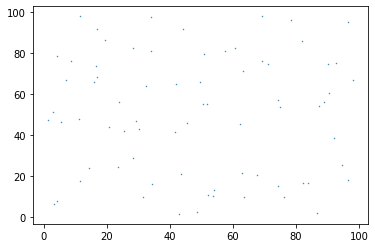

In [6]:
plt.scatter(dat_oc[:,1],dat_oc[:,2],s=0.2)
np.shape(dat_oc)

(41, 18)

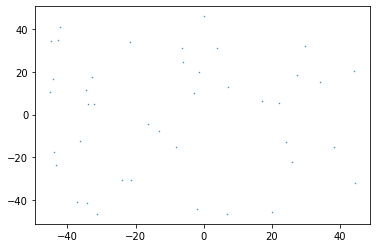

In [7]:
plt.scatter(dat_test[:,1],dat_test[:,2],s=0.2)
np.shape(dat_test)

In [9]:
def datosGeo(Catalogo):
    a=Catalogo[:,6]
    b=Catalogo[:,7]
    c=Catalogo[:,8]
    def elip(a,b,c):
        return (1/4)*(a**2 - c**2)/(a**2 + b**2 + c**2)
    def elip1(a,c):
        return 1 - (c/a)
    def prol(a,b,c):
        return (1/4)*((b**2 - c**2)+ (b**2 - a**2))/(a**2 + b**2 + c**2)
    rt=[elip1(a,c),elip(a,b,c),prol(a,b,c)]
    
    return rt

In [10]:
geo_test=datosGeo(dat_test)
geo_oc=datosGeo(dat_oc)

(array([4., 3., 5., 5., 6., 2., 6., 6., 2., 2.]),
 array([0.0571747 , 0.07388225, 0.09058981, 0.10729736, 0.12400492,
        0.14071247, 0.15742003, 0.17412758, 0.19083514, 0.20754269,
        0.22425025]),
 <a list of 10 Patch objects>)

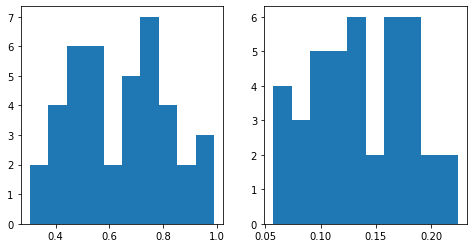

In [18]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(geo_test[0])
plt.subplot(122)
plt.hist(geo_test[1])

(array([1., 2., 4., 2., 1., 0., 6., 5., 7., 6., 7., 5., 8., 3., 4., 3., 2.,
        1., 4., 2.]),
 array([0.0450121 , 0.05380346, 0.06259483, 0.0713862 , 0.08017757,
        0.08896894, 0.09776031, 0.10655168, 0.11534305, 0.12413442,
        0.13292579, 0.14171716, 0.15050853, 0.15929989, 0.16809126,
        0.17688263, 0.185674  , 0.19446537, 0.20325674, 0.21204811,
        0.22083948]),
 <a list of 1 Patch objects>)

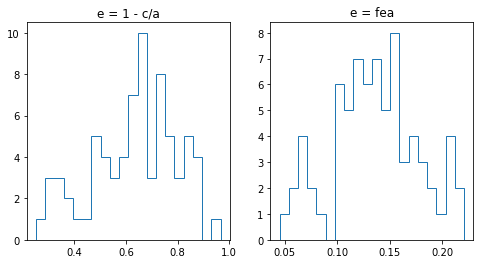

In [27]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('e = 1 - c/a')
plt.hist(geo_oc[0],bins=20,histtype= 'step')
plt.subplot(122)
plt.title('e = fea')
plt.hist(geo_oc[1],bins=20,histtype= 'step')

(-0.3, 0.3)

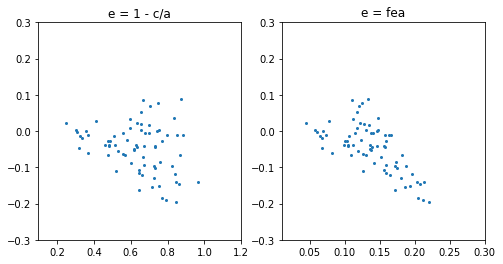

In [50]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('e = 1 - c/a')
plt.scatter(geo_oc[0],geo_oc[2],s=4)
plt.xlim(0.1,1.2)
plt.ylim(-0.3,0.3)
plt.subplot(122)
plt.title('e = fea')
plt.scatter(geo_oc[1],geo_oc[2],s=4)
plt.xlim(0.01,0.3)
plt.ylim(-0.3,0.3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


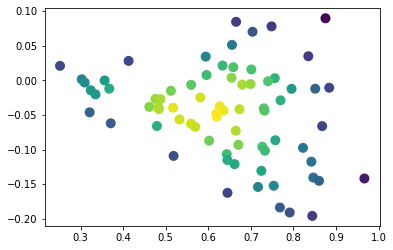

In [53]:
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([geo_oc[0],geo_oc[2]])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(geo_oc[0],geo_oc[2], c=z, s=100, edgecolor='')
plt.show()

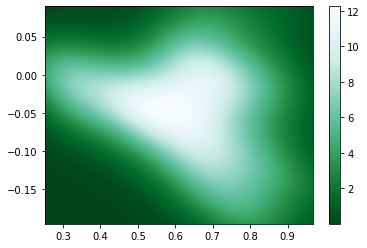

In [63]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = geo_oc[0]
y = geo_oc[2]
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.BuGn_r)
plt.colorbar()
plt.show()

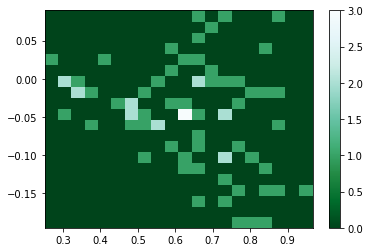

In [69]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = geo_oc[0]
y = geo_oc[2]
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Change color palette
plt.hist2d(x, y, bins=20 ,cmap=plt.cm.BuGn_r)
plt.colorbar()
plt.show()